**Згенеруємо дані (5000 прикладів) та збережемо у файл.**

In [ ]:
import numpy as np

In [ ]:
def generate_example():
  example = np.array([])

  # distribution of marks is 1:1:3:3:2
  marks = np.random.randint(1, 11, (1, 3))[0]
  for i in range(len(marks)):
    if marks[i] > 2 and marks[i] < 6:
      marks[i] = 3
    elif marks[i] >= 6 and marks[i] < 9:
      marks[i] = 4
    elif marks[i] >= 9:
      marks[i] = 5

  # distribution of privilege is 9:1
  privilege = np.random.randint(1, 11)
  if privilege > 9:
    privilege = 1
  else: 
    privilege = 0

  enrolled = 0
  if privilege == 0:
    if (marks >= 4).all():
      score = np.sum(marks)
      if score >= 11:
        enrolled = 1
  else:
    if (marks >= 3).all():
      enrolled = 1
  
  return np.append(marks, [privilege, enrolled])

def generate_data(path, n):
  file = open(path, "w")

  for i in range(n):
    example = generate_example()
    string = ' '.join([str(num) for num in example]) + '\n'
    file.write(string)

  file.close()

In [ ]:
generate_data('data.txt', 5000)

**Зчитаємо дані з файлу та розіб'ємо вибірку на тренувальну та навчальну.**

In [ ]:
import pandas as pd

In [ ]:
def read_data(path):
  data = pd.read_csv(path, sep=' ', header=None, engine="python")
  return data.to_numpy()

def split(array, test_part):
  size = len(array)
  test_size = int(size * test_part)
  train_size = size - test_size
  np.random.shuffle(array)
  return array[:train_size], array[train_size:]

In [ ]:
data = read_data('data.txt')

In [ ]:
size = len(data)
enrolled = data[data[:, 4] > 0]

num_enrolled = len(enrolled)
num_failed = np.count_nonzero(data[:, 4] == 0)
print('Examples: ', size)
print('Enrolled: ', num_enrolled)
print('Failed: ', num_failed)

num_enrolled_simple = np.count_nonzero(enrolled[:, 3] == 0)
num_enrolled_privileged = np.count_nonzero(enrolled[:, 3] > 0)
print('\nEnrolled simple: ', num_enrolled_simple)
print('Enrolled privileged: ', num_enrolled_privileged)

Examples:  5000
Enrolled:  813
Failed:  4187

Enrolled simple:  545
Enrolled privileged:  268


In [ ]:
train, test = split(data, 0.2)
print('Train: ', len(train))
print('Test: ', len(test))

Train:  4000
Test:  1000


In [ ]:
train_x = train[:, :-1]
train_y = train[:, -1]
test_x = test[:, :-1]
test_y = test[:, -1]
print(train_x.shape)
print(train_y.shape)

(4000, 4)
(4000,)


**Побудуємо нейронну мережу для розв'язку поставленої задачі.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
sets = [10, 30, 50, 100]
layers = [1, 2, 3, 4]
results = []

for neurons in sets:
  for layer in layers:
    print(str(neurons) + ' neurons in layer, ' + str(layer) + ' hidden layers')

    model = Sequential()
    model.add(Input(shape=(4,)))
    for i in range(layer):
      model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y),
                        batch_size=100, epochs=20, verbose=0)
    results.append((history.history['accuracy'][-1],
                    history.history['val_accuracy'][-1]))
    print('Accuracies: ' + str(results[-1]) + '\n')

10 neurons in layer, 1 hidden layers
Accuracies: (0.8585000038146973, 0.878000020980835)

10 neurons in layer, 2 hidden layers
Accuracies: (0.9779999852180481, 0.968999981880188)

10 neurons in layer, 3 hidden layers
Accuracies: (0.9745000004768372, 0.9700000286102295)

10 neurons in layer, 4 hidden layers
Accuracies: (0.9957500100135803, 0.9980000257492065)

30 neurons in layer, 1 hidden layers
Accuracies: (0.9447500109672546, 0.9509999752044678)

30 neurons in layer, 2 hidden layers
Accuracies: (0.9990000128746033, 1.0)

30 neurons in layer, 3 hidden layers
Accuracies: (0.9982500076293945, 1.0)

30 neurons in layer, 4 hidden layers
Accuracies: (1.0, 1.0)

50 neurons in layer, 1 hidden layers
Accuracies: (0.9682499766349792, 0.9629999995231628)

50 neurons in layer, 2 hidden layers
Accuracies: (0.9992499947547913, 1.0)

50 neurons in layer, 3 hidden layers
Accuracies: (1.0, 1.0)

50 neurons in layer, 4 hidden layers
Accuracies: (1.0, 1.0)

100 neurons in layer, 1 hidden layers
Accurac

In [ ]:
import itertools
import matplotlib.pyplot as plt

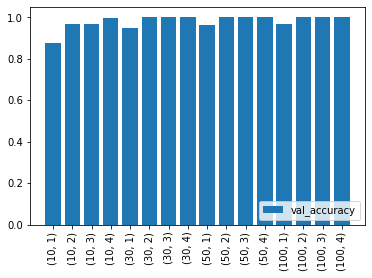

In [ ]:
x = list(itertools.product(sets, layers))
plt.bar([str(e) for e in x], [y[1] for y in results])
plt.xticks(rotation='vertical')
_ = plt.legend(['val_accuracy'], loc=4)

Бачимо, що один із найкращих результатів досягається для моделі з двома прихованими шарами з 30-ма нейронами.

In [ ]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
_ = model.fit(train_x, train_y, validation_data=(test_x, test_y),
              batch_size=100, epochs=20)

Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.9338 - accuracy: 0.4563 - val_loss: 0.5104 - val_accuracy: 0.8460
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.8353 - val_loss: 0.4675 - val_accuracy: 0.8460
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.8353 - val_loss: 0.4277 - val_accuracy: 0.8460
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8353 - val_loss: 0.3925 - val_accuracy: 0.8460
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8353 - val_loss: 0.3527 - val_accuracy: 0.8460
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8353 - val_loss: 0.3127 - val_accuracy: 0.8460
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8415 - val_loss: 0.2713 - val_accuracy: 0.8820
Epoch 8/20
40/40 [==

**Перевіримо модель на власних даних.**

In [ ]:
custom = read_data('custom.txt')
result = model.predict(custom)
for i in range(len(result)):
  if result[i] > 0.5:
    print(str(custom[i]) + ': ' + str(result[i][0]) + ', probably enrolled')
  else:
    print(str(custom[i]) + ': ' + str(result[i][0]) + ', probably failed')

[3 3 3 1]: 0.90760577, probably enrolled
[4 3 5 0]: 0.06680328, probably failed
[2 3 3 1]: 0.29630017, probably failed
[4 4 4 0]: 0.90732765, probably enrolled


Бачимо, що модель працює коректно.